## Load libraries

In [1]:
library(tidyverse)
library(anomalize)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Load Data

In [2]:
df = read.csv("../../data/NYCHA_TS.csv")
df = df[, c('Building_Meter', 'Month', 'Imputed_KWH')]

In [3]:
tb = read_csv("../../data/NYCHA_TS.csv")
tb = select(tb, c('Building_Meter', 'Month', 'Imputed_KWH'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Building_Meter = col_character(),
  Month = col_date(format = ""),
  Month_Type = col_character(),
  `Month_#_Days` = col_double(),
  Prorated_Days = col_double(),
  Gap_Days = col_double(),
  Gap_Type = col_character(),
  Prorated_KWH = col_double(),
  Imputed_KWH = col_double()
)


## Testing Twitter's AnomalyDetection package

In [ ]:
ts = select(filter(df, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')
ts$Month = as.POSIXct(as.character(ts$Month))

res = AnomalyDetectionTs(ts, max_anoms=0.02, direction='both', plot=TRUE)
res$plot

In [ ]:
ts = select(filter(df, Building_Meter == '164.0 - BLD 01_96973681'), 'Month', 'Imputed_KWH')
ts$Month = as.POSIXct(as.character(ts$Month))

res = AnomalyDetectionTs(ts, max_anoms=0.02, direction='both', plot=TRUE)
res$plot

## Exploring the STL function from stats package

In [ ]:
require(graphics)

In [ ]:
plot(stl(nottem, "per"))

In [ ]:
plot(stl(nottem, s.window = 7, t.window = 50, t.jump = 1))

## Exploring the Anomalize package

#### Example 1 - no missing data

In [10]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

ts_anomalized %>% glimpse()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


Observations: 103
Variables: 11
$ Month         <date> 2009-12-01, 2010-01-01, 2010-02-01, 2010-03-01, 2010-0…
$ Imputed_KWH   <dbl> 151280.0, 151382.9, 136106.8, 145211.0, 135622.2, 13849…
$ observed      <dbl> 151280.0, 151382.9, 136106.8, 145211.0, 135622.2, 13849…
$ season        <dbl> -5292.352, -4686.829, -20499.522, -10309.362, -17242.70…
$ trend         <dbl> 154728.3, 154562.4, 154396.6, 154230.7, 154064.8, 15389…
$ remainder     <dbl> 1844.0475, 1507.2546, 2209.7613, 1289.6268, -1199.9609,…
$ remainder_l1  <dbl> -23528, -23528, -23528, -23528, -23528, -23528, -23528,…
$ remainder_l2  <dbl> 23388.25, 23388.25, 23388.25, 23388.25, 23388.25, 23388…
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "…
$ recomposed_l1 <dbl> 125907.9, 126347.6, 110369.0, 120393.3, 113294.1, 11776…
$ recomposed_l2 <dbl> 172824.2, 173263.9, 157285.3, 167309.6, 160210.4, 16467…


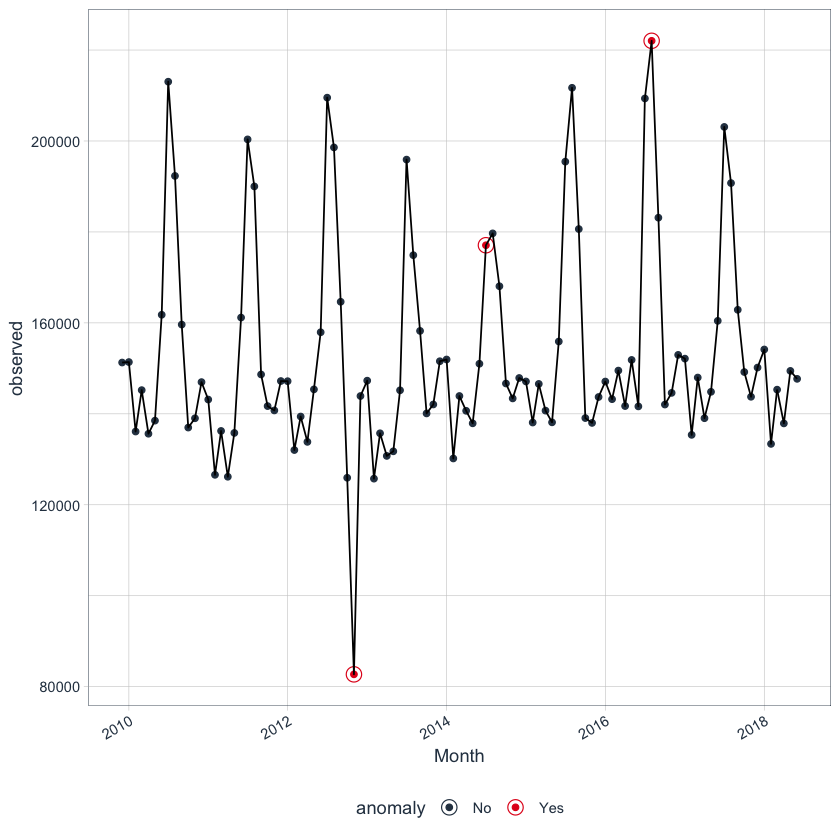

In [11]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

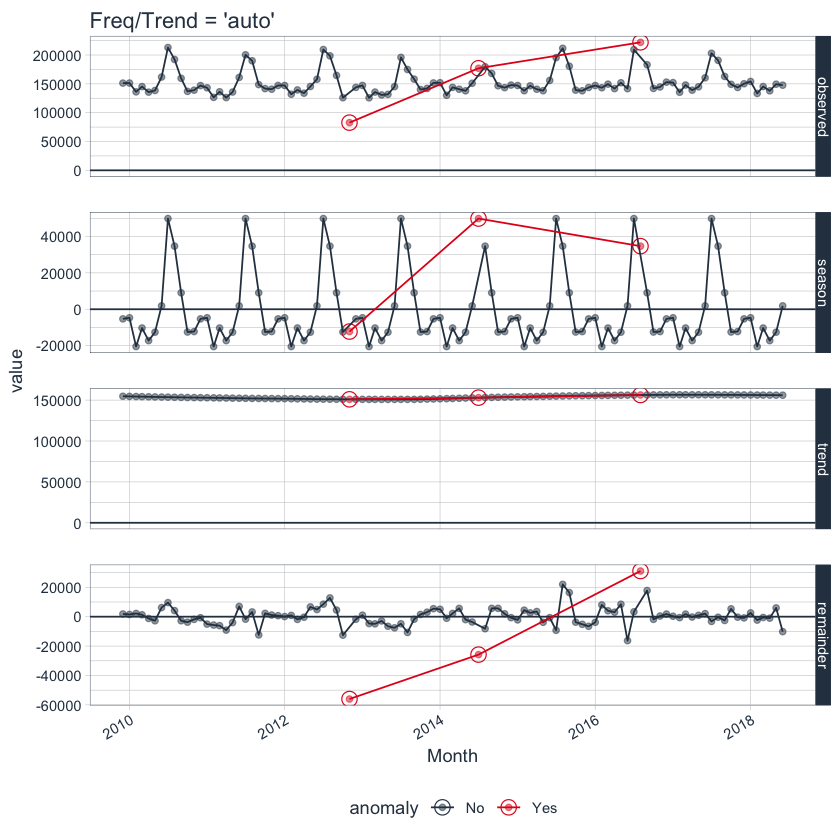

In [12]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")  + geom_line()

p1

#### Example 2 - 3 missing values in the middle (works better than the Twitter library)

In [7]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

Converting from tbl_df to tbl_time.
Auto-index message: index = Month
frequency = 12 months
trend = 42 months


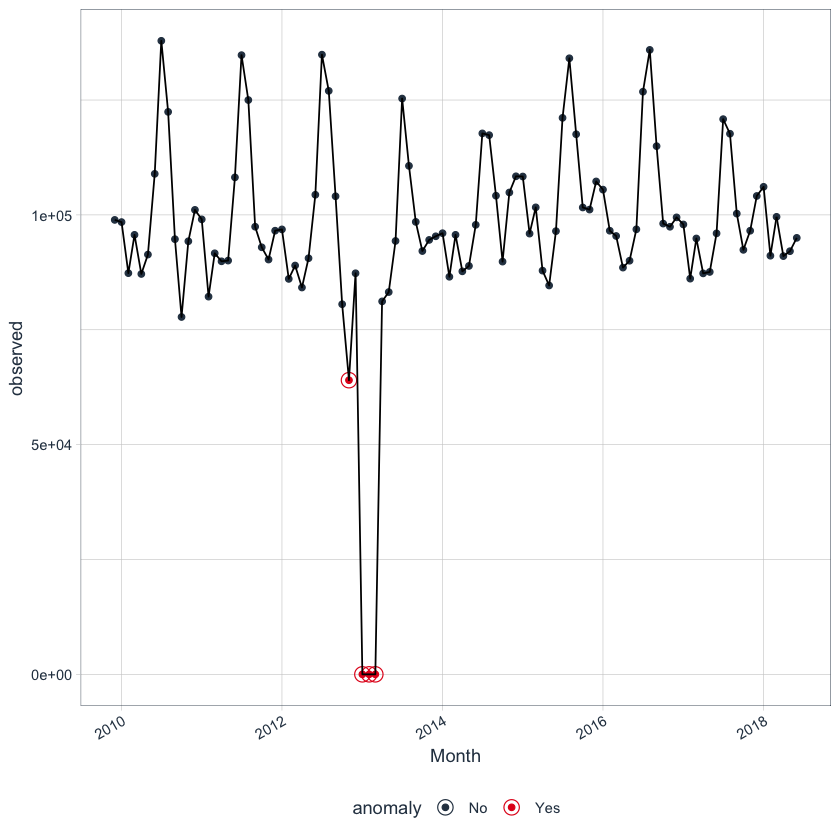

In [8]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

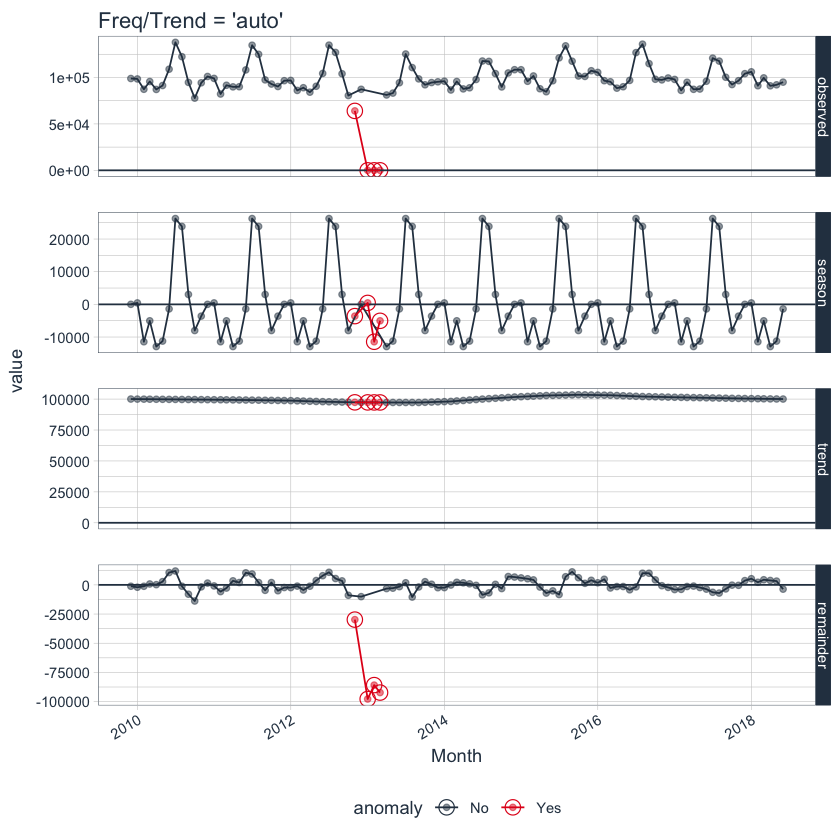

In [9]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'") + geom_line()

p1

#### Example 3 - only 12 points (doesn't work)

In [ ]:
ts =  select(filter(tb, Building_Meter == '1.0 - BLD 04_8638820'), 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, merge = TRUE) %>%
    anomalize(remainder) %>%
    time_recompose()

In [ ]:
ts_anomalized %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

#### Loop through all accounts (with at least 3 years of data)

In [13]:
accounts = tb %>% group_by(Building_Meter) %>% summarise(counts = n())

accounts = filter(accounts, counts >= 36)$Building_Meter

In [14]:
length(accounts)

[1] 2355

In [ ]:
points = c(NA, length(accounts))
anoamly_counts = c(NA, length(accounts))

In [ ]:
start.time <- Sys.time()

for (i in 1:length(accounts)) {
    ts =  select(filter(tb, Building_Meter == accounts[i]), 'Month', 'Imputed_KWH')
    ts_anomalized <- ts %>%
        time_decompose(Imputed_KWH, merge = TRUE) %>%
        anomalize(remainder) %>%
        time_recompose()
    points[i] = dim(ts_anomalized)[1]
    anoamly_counts[i] = dim(filter(ts_anomalized, anomaly == 'Yes'))[1]
}

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

In [ ]:
results = data.frame('points' = points, 'anomalies' = anoamly_counts)

results$perc = results$anomalies / results$points

In [ ]:
head(results)

In [ ]:
summary(results$perc)

In [ ]:
hist(results$perc)

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'") + geom_line()

p1